# Global and Local Mean Depth

In [106]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load Behavioral Data

In [71]:
# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path  = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/TAC_npy_files/matchedVE/normalized/'

# stim 
with open(dpath + 'n_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

# with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy' , 'rb') as f:
#     stim_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy' , 'rb') as f:
#     stim_750 = np.load(f, allow_pickle=True)

with open(dpath + 'n_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'n_X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)

# with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
#     X_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
#     X_750 = np.load(f, allow_pickle=True)

with open(dpath + 'n_X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'n_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
#     y_500 = np.load(f, allow_pickle=True)
    
# with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
#     y_750 = np.load(f, allow_pickle=True)
    
with open(dpath + 'n_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)

In [3]:
# TAC_raw_individual_trial_residuals_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

TAC_raw_individual_trial_residuals_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

# residuals
with open(TAC_raw_individual_trial_residuals_path + 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_500.npy' , 'rb') as f:
    residuals_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_residuals_path + 'residuals_750.npy' , 'rb') as f:
    residuals_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_1000.npy' , 'rb') as f:
    residuals_1000 = np.load(f, allow_pickle=True)

In [9]:
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_500 = [elem.split('/')[1][:-2] for elem in stim_500]
stimfolder_750 = [elem.split('/')[1][:-2] for elem in stim_750]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


## Global Mean Depth x Behavioral Data

In [10]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [19]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [77]:
# corr, p-value
print('Correlation between Linear Model Residuals and Global Mean Depth')
print('250 ms: ',stats.pearsonr(residuals_250, globalMeanDepths))
print('500 ms: ',stats.pearsonr(residuals_500, globalMeanDepths))
print('750 ms: ',stats.pearsonr(residuals_750, globalMeanDepths))
print('1000 ms: ',stats.pearsonr(residuals_1000, globalMeanDepths))


Correlation between Linear Model Residuals and Global Mean Depth
250 ms:  (-0.05541567860071753, 0.4452040708461229)
500 ms:  (-0.07944038291213659, 0.273384234967141)
750 ms:  (-0.06658741603677268, 0.3587988534565601)
1000 ms:  (-0.06789747324851875, 0.3494009703407157)


In [78]:
# corr, p-value
print('Correlation between Estimated Depth and Global Mean Depth')
print('250 ms: ',stats.pearsonr(y_250, globalMeanDepths))
print('1000 ms: ',stats.pearsonr(y_1000, globalMeanDepths))


Correlation between Estimated Depth and Global Mean Depth
250 ms:  (0.3408241064222478, 1.3156074564855622e-06)
1000 ms:  (0.32726827928685787, 3.597339564432802e-06)


m: [0.21304467]
b: 0.4490007263318826
R-squared:  0.10710452662738079


0.107

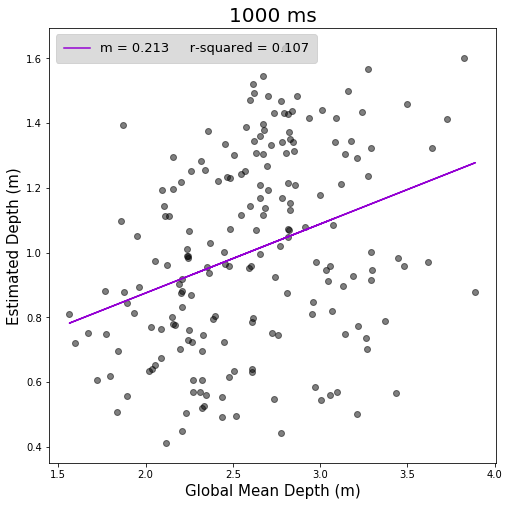

In [82]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(globalMeanDepths).reshape(-1,1)
y = y_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.04959809]
b: 0.1290109080163554
R-squared:  0.0030708974347780638


0.003

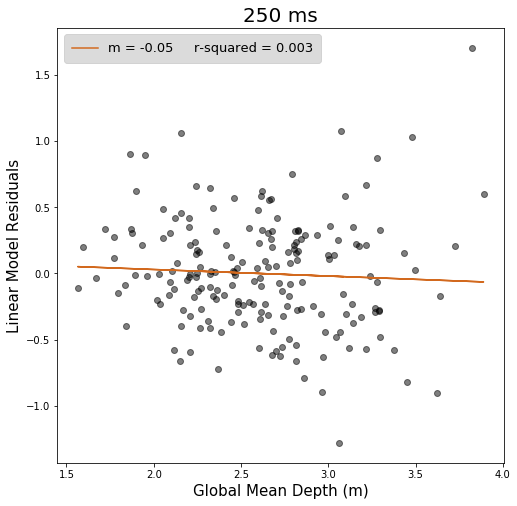

In [80]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(globalMeanDepths).reshape(-1,1)
y = residuals_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Local Mean Depth

In [88]:
def getTargetLocation(stimfolder, rootdir):
    """
    imagepath = target folder 
    rootdir = main folder of all target folders (NOT SUNRGBD folder)
    """
#     stimfolder = imagepath.split('/')[-2]
    jsonpath = rootdir + '/' + stimfolder + '/data.json'
    
    # Opening JSON file
    f = open(jsonpath,)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)
    crossing_point = data['objects'][0]['crossing_point']
    # x, y is a misnomer for array indeces 
    # x value = 364 (verticel midline of image aka column index)
    x = crossing_point[0]['x']
    # y value - row index 
    y = crossing_point[0]['y']
    row_index = y
    col_index = x
    return (row_index,col_index)
    

In [94]:
final_stimuli = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

stimuli = []

for folder in os.listdir(final_stimuli):
    if 'resize' in folder:
        stimuli.append(folder)

In [95]:

target_coords = [getTargetLocation(path, final_stimuli) for path in stimuli]


In [96]:
stimuli[0], target_coords[0]

('000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize_1',
 (91.40339449541284, 364))

In [112]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]):
        yield x, y

In [127]:
def local_mean_depth(pic, depth_data):
    '''
    Args:
    pic - list of all the points that are in the defined circle around the target
    depth_data - depth map for the stimulus
    Returns:
    local mean depth of the area subscribed by the circle
    '''
    depths = []
    for p in pic:
        d = depth_data[p[0]][p[1]]
        depths.append(d)
    return np.mean(np.array(depths))

In [202]:
def local_depth_std(pic, depth_data):
    '''
    Args:
    pic - list of all the points that are in the defined circle around the target
    depth_data - depth map for the stimulus
    Returns:
    local std of depth in the area subscribed by the circle
    '''
    depths = []
    for p in pic:
        d = depth_data[p[0]][p[1]]
        depths.append(d)
    return np.std(np.array(depths))

In [226]:
# calculate the local mean depth for all stimuli for a defined radius
radius = 80
all_localMDs = []
all_local_stds = []
for i in range(len(target_coords)):
    tc = target_coords[i]
    stim = stimuli[i]
    depth_bfx_path = kinect192_path + '/' + stim[:-2] + '/depth_bfx'
    for file in os.listdir(depth_bfx_path):
        if 'png' in file:
            dm = Image.open(depth_bfx_path + '/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
    # points in circle 
    pic = list(points_in_circle_np(radius, int(tc[0]), tc[1]))
    localMD = local_mean_depth(pic, depth_data)
    local_std = local_depth_std(pic, depth_data)
    all_localMDs.append(localMD)
    all_local_stds.append(local_std)
    
    

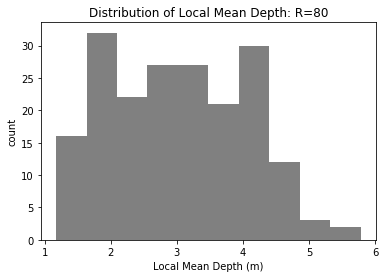

In [227]:
plt.hist(all_localMDs, color='gray')
plt.title('Distribution of Local Mean Depth: R=' + str(radius))
plt.xlabel('Local Mean Depth (m)')
plt.ylabel('count')
plt.show()

In [228]:
# corr, p-value
print('Correlation between Linear Model Residuals and Local Mean Depth (r = ' + str(radius) + ')')
print('250 ms: ',stats.pearsonr(residuals_250, all_localMDs))
print('500 ms: ',stats.pearsonr(residuals_500, all_localMDs))
print('750 ms: ',stats.pearsonr(residuals_750, all_localMDs))
print('1000 ms: ',stats.pearsonr(residuals_1000, all_localMDs))


Correlation between Linear Model Residuals and Local Mean Depth (r = 80)
250 ms:  (-0.0757448188683606, 0.2963936549708654)
500 ms:  (-0.01112615713874342, 0.8782669163527521)
750 ms:  (-0.037195863122767334, 0.6085021314342833)
1000 ms:  (-0.10662643005748333, 0.14101790266060804)


In [229]:
# corr, p-value
print('Correlation between Estimated Depth and Local Mean Depth (r = ' + str(radius) + ')')
print('250 ms: ',stats.pearsonr(y_250, all_localMDs))
print('1000 ms: ',stats.pearsonr(y_1000, all_localMDs))


Correlation between Estimated Depth and Local Mean Depth (r = 80)
250 ms:  (0.009027559360091725, 0.9010973604710221)
1000 ms:  (0.011965822301722103, 0.8691592595425511)


m: [0.00267394]
b: 0.9948134213364543
R-squared:  8.149682799996061e-05


0.0

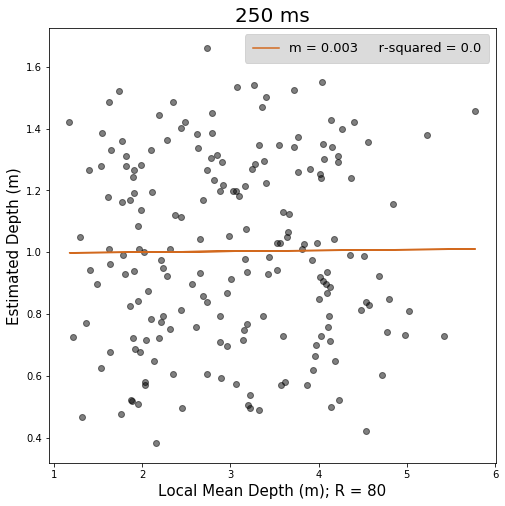

In [230]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(all_localMDs).reshape(-1,1)
y = y_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Local Mean Depth (m); R = " + str(radius), fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.0433767]
b: 0.13108910667552967
R-squared:  0.011369195586803382


0.011

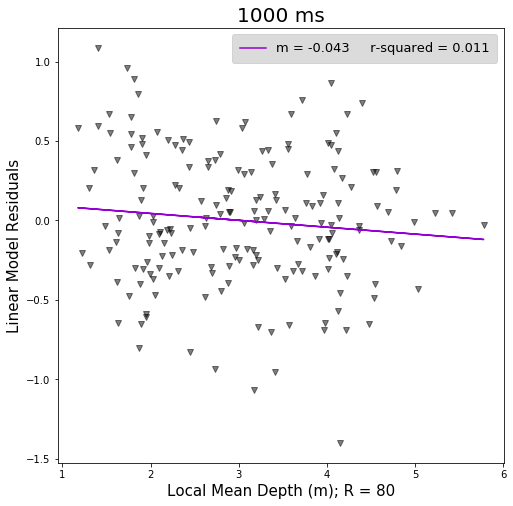

In [231]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(all_localMDs).reshape(-1,1)
y = residuals_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5, marker = 'v');
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Local Mean Depth (m); R = " + str(radius), fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Local Standard Deviation of Depth

Take absolute value of the residuals since std is always positive.

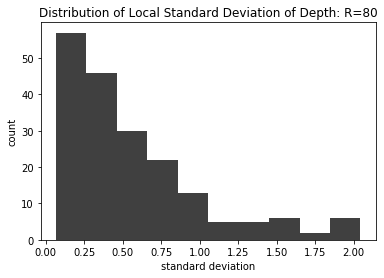

In [232]:
plt.hist(all_local_stds, color='black', alpha=0.75)
plt.title('Distribution of Local Standard Deviation of Depth: R=' + str(radius))
plt.xlabel('standard deviation')
plt.ylabel('count')
plt.show()

In [233]:
# corr, p-value
print('Correlation between Linear Model Residuals and Local Std (r = ' + str(radius) + ')')
print('250 ms: ',stats.pearsonr(np.abs(residuals_250), all_local_stds))
print('500 ms: ',stats.pearsonr(np.abs(residuals_500), all_local_stds))
print('750 ms: ',stats.pearsonr(np.abs(residuals_750), all_local_stds))
print('1000 ms: ',stats.pearsonr(np.abs(residuals_1000), all_local_stds))


Correlation between Linear Model Residuals and Local Std (r = 80)
250 ms:  (-0.12187432195203499, 0.09218245148511331)
500 ms:  (0.043108162428619264, 0.5527129351337985)
750 ms:  (-0.09394063231202517, 0.1949590860861911)
1000 ms:  (-0.11048598105751958, 0.12710547537266265)


In [234]:
# corr, p-value
print('Correlation between Estimated Depth and Local Std (r = ' + str(radius) + ')')
print('250 ms: ',stats.pearsonr(y_250, all_local_stds))
print('1000 ms: ',stats.pearsonr(y_1000, all_local_stds))


Correlation between Estimated Depth and Local Std (r = 80)
250 ms:  (-0.0826061049328696, 0.25466256416852706)
1000 ms:  (-0.0756111862275426, 0.29724908036636594)


m: [-0.05130469]
b: 1.0321845318530403
R-squared:  0.005717051482735935


0.006

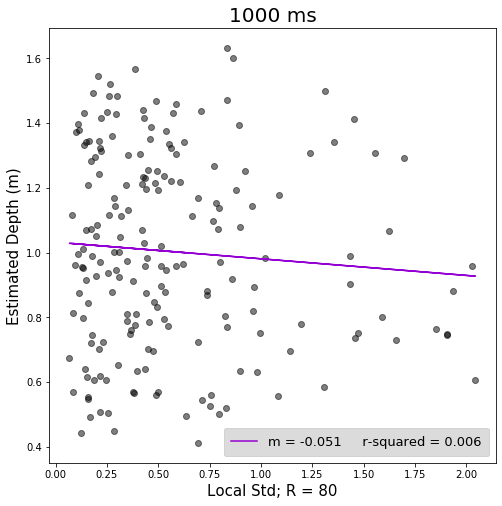

In [235]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(all_local_stds).reshape(-1,1)
y = y_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Local Std; R = " + str(radius), fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.07204876]
b: 0.3623151518678965
R-squared:  0.014853350351268113


0.015

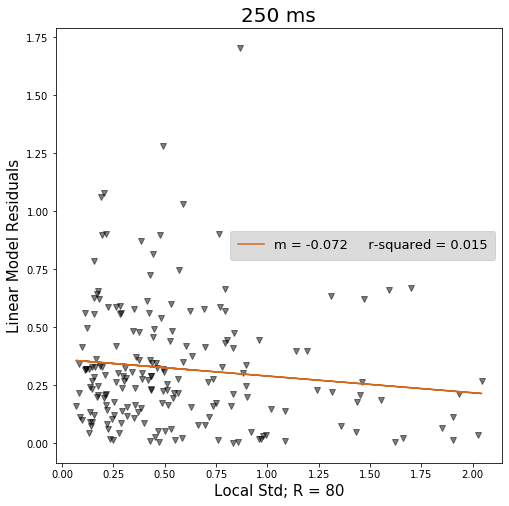

In [236]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(all_local_stds).reshape(-1,1)
y = np.abs(residuals_250)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5, marker = 'v');
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Local Std; R = " + str(radius), fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Actual Depth x Cue

In [237]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" +targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

192

In [243]:
# corr, p-value
print('Correlation between Actual Depth and Local Standard Deviation (R=80)')
print(stats.pearsonr(actual_depth_values, all_local_stds))


Correlation between Actual Depth and Local Standard Deviation (R=80)
(-0.06287282245610154, 0.38629275521456724)


In [244]:
# corr, p-value
print('Correlation between Actual Depth and Local Mean Depths (R=80)')
print(stats.pearsonr(actual_depth_values, all_localMDs))


Correlation between Actual Depth and Local Mean Depths (R=80)
(0.04554490361886064, 0.5304669813285359)


In [245]:
# corr, p-value
print('Correlation between Actual Depth and Global Mean Depth')
print(stats.pearsonr(actual_depth_values, globalMeanDepths))


Correlation between Actual Depth and Global Mean Depth
(0.4499885764504463, 5.824265392138924e-11)
